<a href="https://colab.research.google.com/github/Migaalee/Deep_learning/blob/main/ADNE_tutorial_by_Migla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - ADNE 2022

## Tensorflow and Keras Tutorial - Practical exercise

### Aims

In this exercise, we will learn how to use Tensorflow and Keras API to create, train and apply deep neural networks. 

Tensorflow: 

- First we will cover some basic Tensorflow operations
- We will train a linear regression model using AUTO MPG dataset in order to predict the Miles Per Gallon (mpg) of cars with different attributes
- We will train a model and discuss suitable hyperparameters 
- In order to evaluate a model we will compare training and validation errors using mean squared error

Keras (sequential and functional):

- Using Fashion MNIST dataset we will create a CNN model in order to classify images
- We will train the model and discuss suitable hyperparameters using sequential and functional Keras 
- In order to evaluate a model we will calculate accuracy and loss using training and estimate model performace using a test dataset

### How this works
This file is a [Jupyter Notebook](https://jupyter.org). 
It has instructions, and also code cells. The code cells are connected to Python, and you can run all of the code in a cell by pressing Play (▶) icon in the top bar, or pressing `shift + return`.
The code libraries you should need are already installed.


### Import libraries required for all tutorial

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_absolute_error
sns.set()
from tensorflow import keras
from datetime import datetime
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model, Sequential
from keras.constraints import maxnorm
from tensorflow.keras.layers import Input, BatchNormalization, MaxPooling2D, Flatten, Conv2D, Dense, Activation, Dropout, concatenate

## Data set and problem
For this tutorial I will be using [The Auto MPG](https://archive.ics.uci.edu/ml/index.php) dataset, which has been provided provided during lectures. This dataset can be used to predict fuel efficiency of automobiles using different attributes, such as cylinders, displacement, horsepower, weight, acceleration, model year, origin.This is a regression problem with the aim is to predict the output of a continuous value.


In [ ]:
data = files.upload()

Saving AutoMPG.tsv to AutoMPG.tsv


In [ ]:
auto = pd.read_csv(io.BytesIO(data['AutoMPG.tsv']), sep='\t')

To visualise dataset structure.

In [ ]:
print(auto.head(5))

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  26.0          4          97.0          46    1835          20.5   
1  26.0          4          97.0          46    1950          21.0   
2  43.1          4          90.0          48    1985          21.5   
3  44.3          4          90.0          48    2085          21.7   
4  43.4          4          90.0          48    2335          23.7   

   Model Year  Origin  
0          70       2  
1          73       2  
2          78       2  
3          80       2  
4          80       2  


Our total dataset has 392 examples with 8 variables

In [ ]:
print(np.shape(auto))


(392, 8)


While exploratory data analysis and visualisation is not part of this tutorial, it is useful to visualise how MPG correlates with attributes.

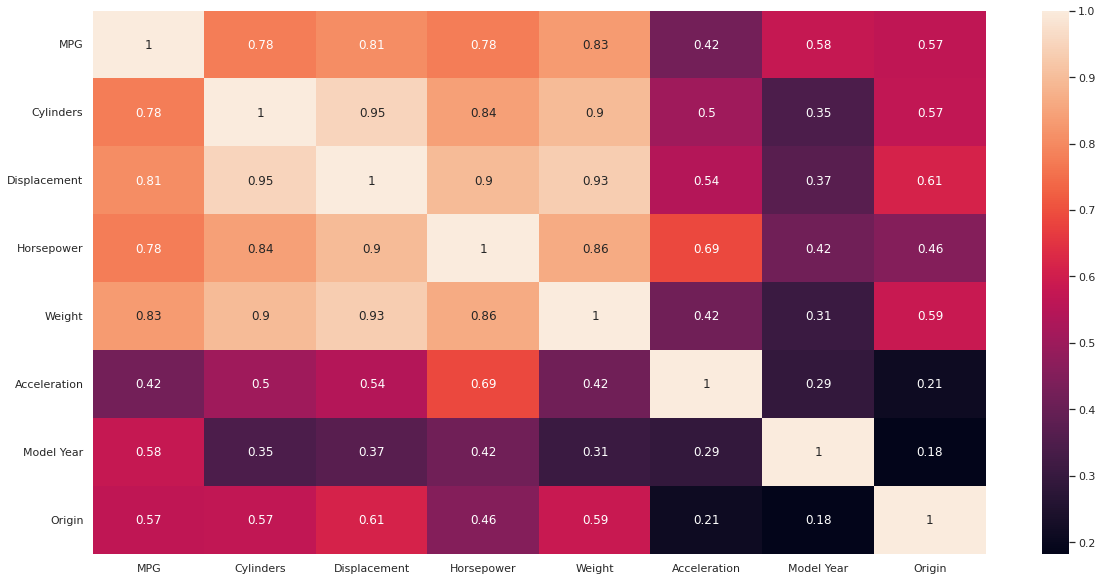

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(auto.corr().abs(),  annot=True)

After further visualising, it is obvious that dataset contains some continous variables as well as categorical data (already numerically encoded), such as Origin.

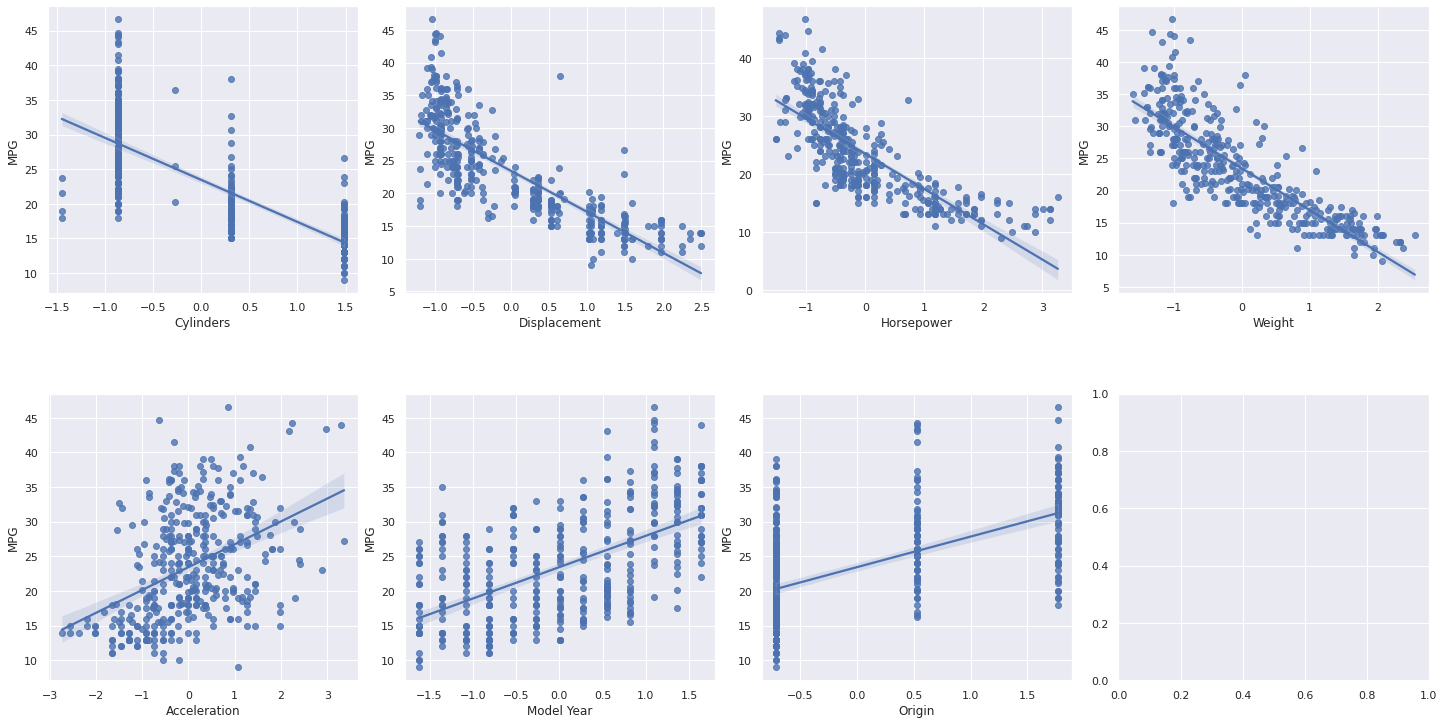

In [ ]:
col_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
x = auto.loc[:,col_names]
y = auto['MPG']
scaler = StandardScaler()

x = pd.DataFrame(data=scaler.fit_transform(x), columns=col_names)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(col_names):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


We can fast check distributions of our data before standartization and after standartization.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

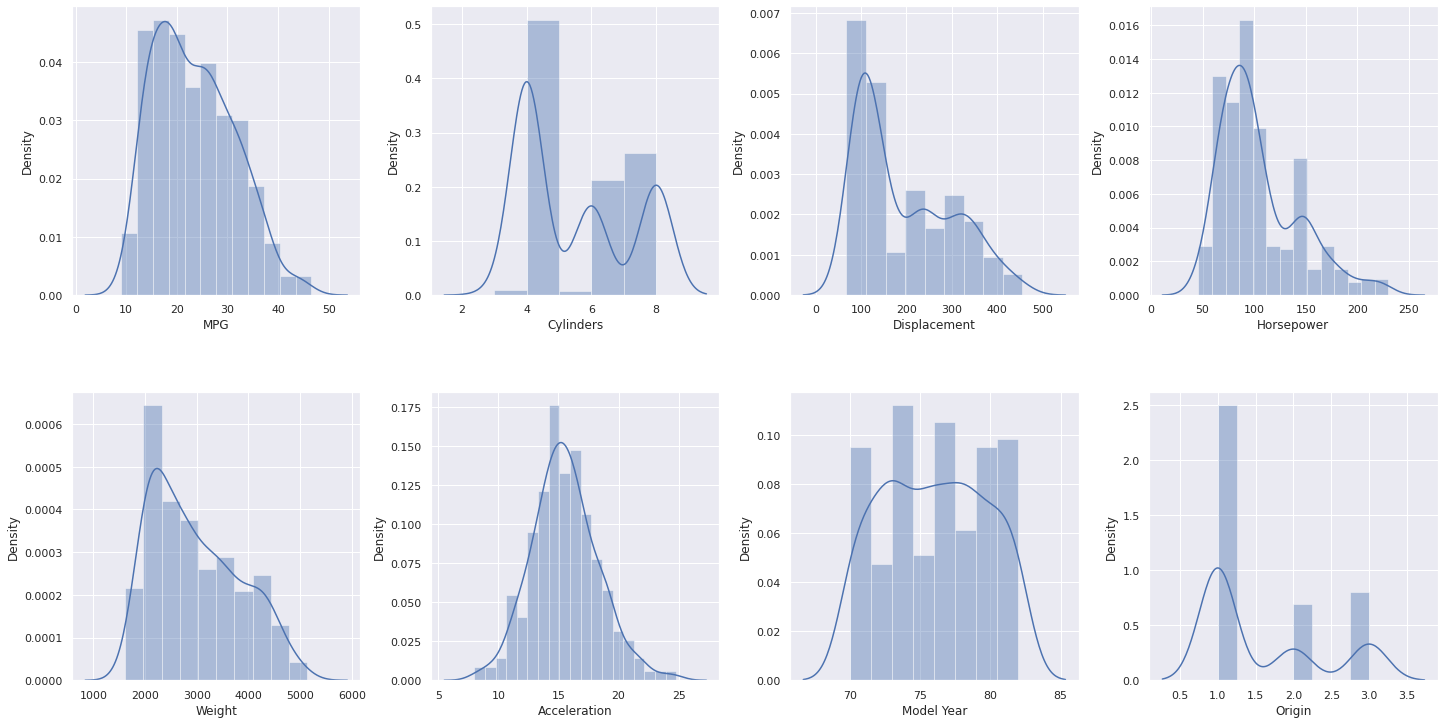

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in auto.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

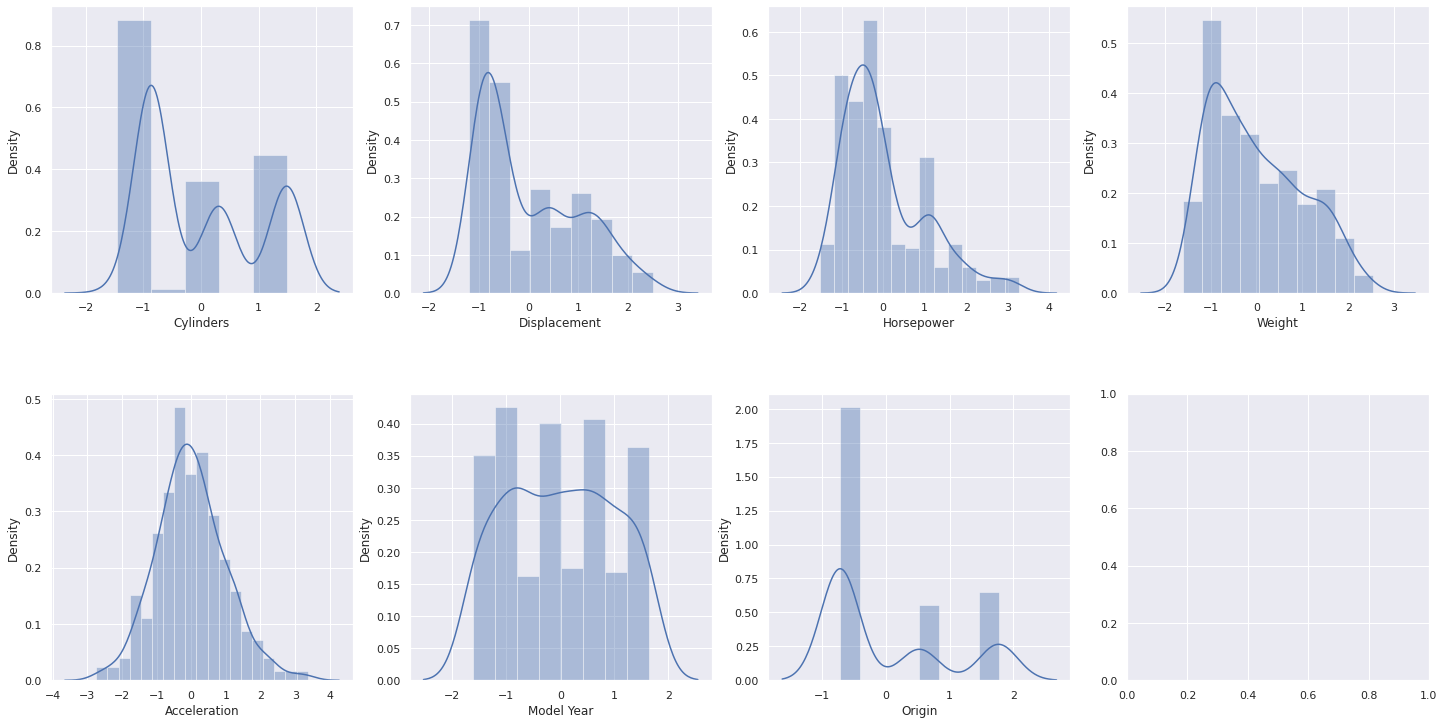

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in x.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Data pre-processing for Tensorflow operations

This tutorial is based on Tensorflow version 2.8.0 and is based on eager execution

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [ ]:
tf.executing_eagerly()

True

I have already standardized our attributes during short exploratory analysis, which will allow us to not have too large or small values and help with convergence. 
However, it is also important to shuttle the data before splitting  into training and testing datasets ir order to reduce any possible bias in data collection.

In [ ]:
y=pd.DataFrame(y)
data = np.concatenate((x,y), axis=1) # first columns will be attributes and last column will be our y
np.random.shuffle(data)

Now after data standartization and shuffling, we will split into training and testing (validation) dataset for training. And leave a dataset for approximating true error.

In [ ]:
x_train, x_true_test, y_train, y_true_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_true_test.shape)
print(y_true_test.shape)
print(x_test.shape)
print(y_test.shape)


(281, 7)
(281,)
(40, 7)
(40,)
(71, 7)
(71,)


## Functions and considerations
In order to train and optimise our model, we need to define several variables and functions:

- define an adequate loss function
- create prediction function for the outputs using a chosen activation function
- define function to calculate gradient of the loss function
- decide training parameters (learning rate, training stepsbatch size, display step)
- initialize weights and biases of the model
- define optimizer and accuracy metrics that we will use
- compute the gradients and update the weights of the model with chosen optimizer
- train our model using a training dataset
- compute metrics using a test dataset

## Regression problem 
In our tutorial we have a simple regression $$y = \beta x + \epsilon$$ problem, where our predictor (dependent variable)  $y$ is MPG, $x$ multiple explanatory variables (inputs), $\beta$ are coefficients (weights that we will be updating) and $\epsilon$ is a stochastic error term. 

##Prediction function 
In order to calculate outputs of our network (net), we need to input explanatory variables (x). Our predictions (net) are calculated by multiplying weights and inputs and subsequently passing those values through a chosen activation function (leaky RelU - tf.nn.leaky_relu) in all hidden layers of our network. 

In [ ]:
def predict(x):
    net = x
    layer = 1 
    for weights, bias in network[:-1]:
        with tf.name_scope(f'Layer_{layer}'):
            net = tf.add(tf.matmul(net, weights), bias, name='net')
            net = tf.nn.leaky_relu(net, name="relu")
        layer += 1
    weights, bias = network[-1]
    with tf.name_scope('Output'):
        net = tf.add(tf.matmul(net, weights), bias)
    return tf.reshape(net, [-1])

## Loss function
We will be training this model to determine the best possible values for our weights ($\beta$) and biases ($\epsilon$) such that the difference between the actual $y$  and predicted $y$ ($y^$) is minimum. For this, we will need to define a  loss function or cost function which we need to minimize. For that we will use Mean Squared Error (MSE) loss function that calculates squared differences between $y^$ and $y$ for $n$ number of examples: 
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y_i} – y)^2$$

This function already exists in TensorFlow library and is a default function for regression. Depending on a dataset and a problem, we could also choose other loss functions that are used in regression, such as Mean Squared Logarithmic Error Loss (MSLE) or Mean Absolute Error Loss (MAE). For example, MSLE would be more adequate for data that has some large predictor values and we do not relax a model when predicting large values. MAE would be suitable for model where we have many outliers (small and large values) as it is more robust to outliers. 


In [ ]:
def loss(x, y):
    net = predict(x)
    return tf.reduce_mean(tf.losses.mean_squared_error(net, y))

## Create network

We need to create a structure for the neural network, where we pass an array with our initial inputs ($x$) and number (n) of layers that we intend to use in our network (layers). The output will be n-dimensional array of tensors with our weigts and biases. Variables will be a one dimensional array with n tensors * 2 (weights+biases). 

 

In [ ]:
def create_network(x, layers):
    network = []
    variables = []
    previous = x
    for ix, neurons in enumerate(layers):
        weights, bias = layer(previous, neurons, ix)
        network.append((weights, bias))
        variables.extend((weights, bias))
        previous = weights
    return network, variables

## Automatic differentiation

Automatic differentiation is useful in backpropagation for training neural networks. TensorFlow provides the tf.GradientTape API for automatic differentiation, which allows to trace all computations and compute derivatives of the loss function with respect to our trainable variables (weights and biases). 

In [ ]:
def grad(x, y):
    with tf.GradientTape() as tape:
        loss_val = loss(x, y)
    return tape.gradient(loss_val, variables), variables

## Initialize weights and biases

The random initialization of weights is critical for learning how to properly map our inputs to outputs. Weight between two neurons will decide how much influence that specific input will have in our models output. Our initial weight values will be obtained randomly from a Gaussian distribution (with a mean zero and standard deviation of 2 over number of neurons). This initialization method, known as  He method of weight initialization (2/n) is similar to Xavier method (1/n) and is well suited for leaky RelU activation function. Both of those methods are good in order to overcome problems, such as vanishing gradient or exploding gradient and avoid slow convergence isssues. The outputs of this function will two tensors, one for weights and another for bias, both initialized with a tensor variable tf.Variable.

In [ ]:
def layer(inputs, neurons, layer_ix):
    weights = tf.Variable(tf.random.normal((inputs.shape[1], neurons), stddev=2/neurons), name=f"Layer_{layer_ix} Weights")
    bias = tf.Variable(tf.zeros([neurons]), name=f"Layer_{layer_ix} Bias")
    return weights, bias

## Define network and hyperparameters

### Learning rate 
Learning rate is an important parameter as small learning rate will be ineficient and large learning rate might lead to convergence problems. This parameter refers to the rate at which an algorithm converges to a solution. In SGD optimizer, learning rate is a fixed hyperparameter, however in other optimizers, this parameter can be modified during the training. This would be useful when some parameters that we do not want to change at the same rate.

### Batch size
Batch size defines the number of samples we use in one epoch to train a neural network. In SGD, we use  only one random sample from the training set in one epoch, however we can also use mini-batch gradient descent, which would use previously selected number of samples from the training set in one epoch. Changing batch size will affect training time of our model.

### Epochs
One Epoch is when an all dataset is passed forward and backward through the neural network only once.

### Batches per epoch
Because we do not pass the entire dataset into model at once, we divide dataset into batches per epoch. That means that for the batch size of 32, we will have 8 batches per epoch during training.


### Optimizers
Various optimization algorithms exist for training neural network, such as SGD (first optimizer that we are trying) and other popular optimizers, such as mini-batch gradient descent, Adam, Adagrad, Adadelta, RMSPROP. 


### Momentum
Momentum in SGD reduces variance, because it helps to reduce the oscillations and high variance of the parameters, this way helping with a better convergence. The good range for momentum optimization is from 0.5 to 0.9. To start I have chosen a momentum of 0.8.

### Learning rate decay
This parameter changes how the learning rate of SGD optimizer changes over time. 

In [ ]:
layers = [25, 15, 1] 
network, variables = create_network(x_train, layers)
batch_size = 32
batches_per_epoch = x_train.shape[0]//batch_size
epochs = 25
optimizer = tf.optimizers.SGD(learning_rate=0.005, momentum=0.8, decay=0.005/epochs)

## Function to run a model
For finding the optimized values of the parameters for which loss function is minimized, we will be using a commonly used optimizer algorithm called Gradient Descent.

For visualization purposes, training and validation errors were converted from the mean squared error to an error in miles per galon. 

In [ ]:
stds=  np.std(data, axis=0)
def run(x, y, x_test, y_test, batch_size, batches_per_epoch, epochs, optimizer):

  train_err = []
  valid_err = []
  
  for epoch in range(epochs):

      shuffled = np.arange(len(y)) 
      np.random.shuffle(shuffled)

      for batch_num in range(batches_per_epoch):
          start = batch_num*batch_size
          batch_xs = tf.constant(x[shuffled[start:start+batch_size], :].astype(np.float32))
          batch_ys = tf.constant(y[shuffled[start:start+batch_size]].astype(np.float32))
          gradients, variables = grad(batch_xs, batch_ys)
          optimizer.apply_gradients(zip(gradients, variables))

      train_error = loss(tf.constant(x.astype(np.float32)),
                        tf.constant(y.astype(np.float32))) ** 0.5 *  stds[-1]
      valid_error = loss(tf.constant(x_test.astype(np.float32)),
                        tf.constant(y_test.astype(np.float32))) ** 0.5 *  stds[-1]
      train_err.append(train_error)
      valid_err.append(valid_error)

      print(f"Epoch {epoch}, Training Error: {train_error}, Test Error: {valid_error}")
  
  true_error=loss(tf.constant(x_true_test.astype(np.float32)),
                        tf.constant(y_true_test.astype(np.float32))) ** 0.5 *  stds[-1]
  
  print('True error on testing dataset=', true_error.numpy())

  return (train_err, valid_err)

## Train the model

In [ ]:
train_errs, valid_errs = run(x= x_train, y = y_train,
                            x_test = x_test, y_test = y_test,
                            batch_size = batch_size,
                            batches_per_epoch = batches_per_epoch,
                            epochs = epochs, optimizer = optimizer)

Epoch 0, Training Error: 51.88524627685547, Test Error: 48.215232849121094
Epoch 1, Training Error: 31.605607986450195, Test Error: 29.82719612121582
Epoch 2, Training Error: 30.968355178833008, Test Error: 31.24095916748047
Epoch 3, Training Error: 25.05547332763672, Test Error: 24.420846939086914
Epoch 4, Training Error: 22.79693603515625, Test Error: 21.28990936279297
Epoch 5, Training Error: 23.157428741455078, Test Error: 22.424915313720703
Epoch 6, Training Error: 22.25765037536621, Test Error: 22.46297836303711
Epoch 7, Training Error: 21.249126434326172, Test Error: 21.206790924072266
Epoch 8, Training Error: 23.758333206176758, Test Error: 25.327224731445312
Epoch 9, Training Error: 21.613033294677734, Test Error: 23.18480110168457
Epoch 10, Training Error: 20.2657413482666, Test Error: 21.305402755737305
Epoch 11, Training Error: 24.47356414794922, Test Error: 23.538188934326172
Epoch 12, Training Error: 22.625150680541992, Test Error: 26.044443130493164
Epoch 13, Training Er

## Plot model during training 

In [ ]:
# Model visualization function to generate graph during training
def plot(epochs,train_errs,valid_errs):
    epochs = range(1, epochs+1)
    plt.plot(epochs, train_errs, 'r', label='Training error')
    plt.plot(epochs, valid_errs, 'b', label='Validation error')
    plt.title('Training and validation errors')
    plt.xlabel('Epochs')
    plt.ylabel('MSE (MPG)')
    plt.legend(loc='upper right')
    plt.show()

## Visualization of errors during training

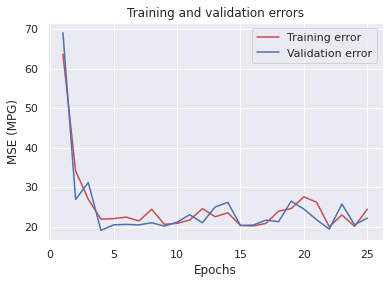

In [ ]:
plot(epochs,train_errs,valid_errs)

We can see that our model is overfitting as our training error is lower than our validation error. Also, we have high oscilations in our model. We could try to decrease momentum.

In [ ]:
layers = [25, 15, 1] 
network, variables = create_network(x_train, layers)
batch_size = 32
batches_per_epoch = x_train.shape[0]//batch_size
epochs = 25
optimizer2 = tf.optimizers.SGD(learning_rate=0.005, momentum=0.8, decay=0.005/epochs)

In [ ]:
train_errs2, valid_errs2 = run(x= x_train, y = y_train,
                            x_test = x_test, y_test = y_test,
                            batch_size = batch_size,
                            batches_per_epoch = batches_per_epoch,
                            epochs = epochs, optimizer = optimizer2)

Epoch 0, Training Error: 82.11976623535156, Test Error: 81.93335723876953
Epoch 1, Training Error: 34.43888473510742, Test Error: 34.84565353393555
Epoch 2, Training Error: 24.294336318969727, Test Error: 23.464292526245117
Epoch 3, Training Error: 24.35819435119629, Test Error: 25.60781478881836
Epoch 4, Training Error: 22.51993751525879, Test Error: 22.17493438720703
Epoch 5, Training Error: 21.452598571777344, Test Error: 22.123674392700195
Epoch 6, Training Error: 22.011558532714844, Test Error: 24.05215835571289
Epoch 7, Training Error: 22.808443069458008, Test Error: 22.83426284790039
Epoch 8, Training Error: 21.249404907226562, Test Error: 23.13547706604004
Epoch 9, Training Error: 20.88462257385254, Test Error: 23.377553939819336
Epoch 10, Training Error: 21.452747344970703, Test Error: 23.733654022216797
Epoch 11, Training Error: 20.530048370361328, Test Error: 22.913738250732422
Epoch 12, Training Error: 20.643728256225586, Test Error: 23.437366485595703
Epoch 13, Training Er

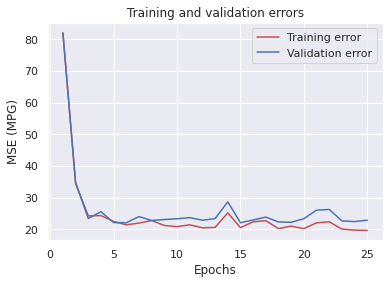

In [ ]:
plot(epochs,train_errs2,valid_errs2)

## Changing weight decay and momentum to improve overfitting 

In [ ]:
layers = [25, 15, 1] 
network, variables = create_network(x_train, layers)
batch_size = 32
batches_per_epoch = x_train.shape[0]//batch_size
epochs = 25
optimizer3 = tf.optimizers.SGD(learning_rate=0.005, momentum=0.6, decay=0.005/epochs)

In [ ]:
train_errs3, valid_errs3 = run(x= x_train, y = y_train,
                            x_test = x_test, y_test = y_test,
                            batch_size = batch_size,
                            batches_per_epoch = batches_per_epoch,
                            epochs = epochs, optimizer = optimizer3)

Epoch 0, Training Error: 200.96188354492188, Test Error: 208.34771728515625
Epoch 1, Training Error: 40.251136779785156, Test Error: 38.160667419433594
Epoch 2, Training Error: 24.873693466186523, Test Error: 22.161537170410156
Epoch 3, Training Error: 26.890960693359375, Test Error: 27.615575790405273
Epoch 4, Training Error: 25.166669845581055, Test Error: 26.24970054626465
Epoch 5, Training Error: 22.65898323059082, Test Error: 22.892864227294922
Epoch 6, Training Error: 22.44823455810547, Test Error: 22.197509765625
Epoch 7, Training Error: 22.906190872192383, Test Error: 21.898168563842773
Epoch 8, Training Error: 22.9011287689209, Test Error: 21.95905876159668
Epoch 9, Training Error: 22.815574645996094, Test Error: 21.79363250732422
Epoch 10, Training Error: 22.114604949951172, Test Error: 21.648761749267578
Epoch 11, Training Error: 22.020532608032227, Test Error: 22.014930725097656
Epoch 12, Training Error: 22.59367561340332, Test Error: 21.930891036987305
Epoch 13, Training E

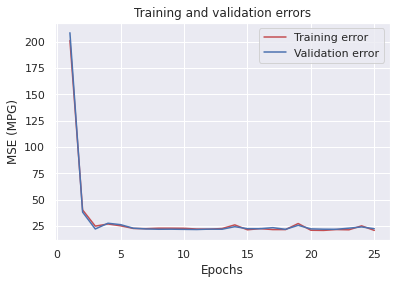

In [ ]:
plot(epochs,train_errs3,valid_errs3)

While, running a model it looks like overfitting is solved, this will not be a case if I shuffle data again before splitting data into training, validation and testing datasets. This implies that we do not have enough examples in our dataset. There are other ways of dealing with overfitting, such as adding different regularization constraints, early stopping while training, reducing complexity of the model, adding more data to the training. 

# Keras - Sequential

## Data set and problem

For this tutorial I will be using [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset, which has also been provided provided during lectures. This dataset consists of 60,000 examples for training and 10,000 examples of 28x28 grayscale images associated with a label from one of 10 classes. It is a good dataset to explore classification problem and learn CNN. 

### Data -preprocessing 
We can load dataset directly using keras API.

In [ ]:
((trainXs, trainYs), (testXs, testYs)) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In order to use data in our neural network, we must reshape the features to 28 × 28 × 1 to fit our convolution layers. 
We also need to rescale the data, first we convert data to floats and after divide by a maximum value of the pixels (255).
We also transform our categorical labels using one-hot encoding, this way categorical data is encoded in a vector and can be passed in our model as labels.

In [ ]:
trainX = trainXs.reshape((trainXs.shape[0], 28, 28, 1))
testX = testXs.reshape((testXs.shape[0], 28, 28, 1))
trainX = trainXs.astype("float32") / 255.0
testX = testXs.astype("float32") / 255.0

# one-hot encode the training and testing labels
trainY = keras.utils.to_categorical(trainYs, 10)
testY = keras.utils.to_categorical(testYs, 10)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


 We will keep test datasets for later in order to estimate a true error, meanwhile training dataset can be split into training and validation dataset. 

In [ ]:
valid_images = trainX[50000:]
valid_labels = trainY[50000:]
train_images = trainX[:50000]
train_labels = trainY[:50000]

In [ ]:
print(train_images.shape)

(50000, 28, 28)


## Data visualisation

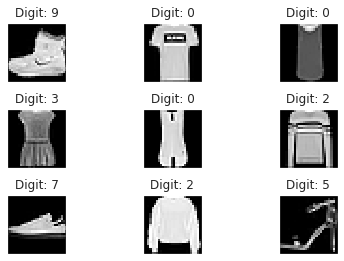

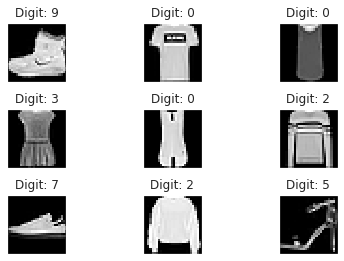

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(trainX[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(trainYs[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Classification problem
Convolutional Neural Networks (CNNs) is the most popular neural network model being used for image classification problem.Overfitting, exploding gradient, and class imbalance can be challenging when training the model using CNN. 

## Softmax
This logistic function can be generalized to output a multiclass categorical probability distribution by the softmax function, where $\varsigma$ softmax function  takes as input a C-dimensional vector z and outputs a C-dimensional vector y  of real values between 0 and 1:

$$y_c = \varsigma(\mathbf{z})_c = \frac{e^{z_c}}{\sum_{d=1}^C e^{z_d}} \quad \text{for} \; c = 1 \cdots C$$



## Loss function for multiclass classification
Categorical cross-entropy is a default loss function  for multi-class classification problems where each class is assigned a unique integer value from 0 to (num_classes – 1). 

$$ -\sum_{i=1}^n \sum_{c=1}^{C} t_{ic} \cdot \log( y_{ic})$$


## Define a CNN model

Batch normalization (BN) is usually added just before or after activation function of each hidden layer. It zero centers and normalizes each input, this way model learn an optimal scale and mean for each of the layer's input. BN has been suggested to improve image classification task strongly reducing vanishing gradient problem. BN also acts as regularization.

Dropout is often used technique for regularization in DNN. During training process each neuron (except for output neurons) can be disconnected at some probability. It can increase accuracy as network adapts. 

In [ ]:
def run_model (opt, trainX, trainY, testX, testY):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1)))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(10))
  model.add(Activation("softmax"))
  opt = opt
  model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
  
  valid_images = trainX[50000:]
  valid_labels = trainY[50000:]
  train_images = trainX[:50000]
  train_labels = trainY[:50000]

  history = model.fit(train_images, train_labels,
                        validation_data=(valid_images, valid_labels),
                        batch_size=bs,
                        epochs=num_epochs) 
  # plotting the metrics
  plt.subplot(2, 1, 1)
  plt.title('Categorical Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='val')
		# plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='val')
    
  model.summary() #We can explore our network after training and look at each step what was the shape of our network and how many parameters we have explored

  score = model.evaluate(testX, testY, verbose=0) #evaluate based on test dataset, which was not used for training and validation
  print('Loss using testing dataset=', score[0])
  print('Accuracy using testing dataset=', score[1]) 

  return history

## Train the model and evaluate it (SGD with high learning rate)
I have started a model with large learning rate in order to demonstrate that high learning rate can result in convergence problems.

In [ ]:
init_LR = 0.5
bs = 32
num_epochs = 25
opt = SGD(learning_rate=init_LR, momentum=0.9, decay=init_LR/num_epochs)

In [ ]:
history_SGD_lr_0_5 = run_model(opt, trainX, trainY, testX, testY)

Epoch 1/25
1563/1563 [==============================] - 106s 67ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1023
Epoch 2/25
1563/1563 [==============================] - 116s 74ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1023
Epoch 3/25
1563/1563 [==============================] - 100s 64ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1023
Epoch 4/25
1563/1563 [==============================] - 99s 63ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1023
Epoch 5/25
1563/1563 [==============================] - 99s 64ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1023
Epoch 6/25
1563/1563 [==============================] - 103s 66ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1023
Epoch 7/25
1563/1563 [==============================] - 101s 65ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1023
Epoch 8/25
1563

## SGD with low learning rate
Reducing learning rate improved convergence problems.

In [ ]:
init_LR = 0.01
bs = 32
num_epochs = 25
opt = SGD(learning_rate=init_LR, momentum=0.9, decay=init_LR/num_epochs)

Epoch 1/25
1563/1563 [==============================] - 120s 76ms/step - loss: 0.4866 - accuracy: 0.8554 - val_loss: 0.3541 - val_accuracy: 0.8692
Epoch 2/25
1563/1563 [==============================] - 105s 67ms/step - loss: 0.2852 - accuracy: 0.8988 - val_loss: 0.2773 - val_accuracy: 0.9002
Epoch 3/25
1563/1563 [==============================] - 103s 66ms/step - loss: 0.2491 - accuracy: 0.9112 - val_loss: 0.2681 - val_accuracy: 0.9044
Epoch 4/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.2278 - accuracy: 0.9189 - val_loss: 0.2569 - val_accuracy: 0.9092
Epoch 5/25
1563/1563 [==============================] - 101s 64ms/step - loss: 0.2135 - accuracy: 0.9241 - val_loss: 0.2530 - val_accuracy: 0.9109
Epoch 6/25
1563/1563 [==============================] - 100s 64ms/step - loss: 0.2000 - accuracy: 0.9285 - val_loss: 0.2516 - val_accuracy: 0.9111
Epoch 7/25
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1913 - accuracy: 0.9310 - val_loss: 0

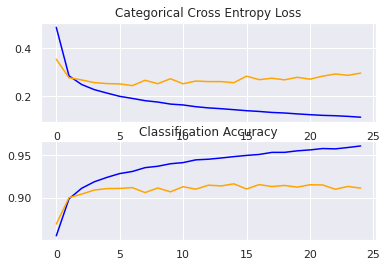

In [ ]:
history_SGD_lr_0_01 = run_model(opt, trainX, trainY, testX, testY)

## SGD with low learning rate and smaller momentum
Moreover, decreasing momentum improved models performance further.

In [ ]:
init_LR = 0.01
bs = 32
num_epochs = 25
opt_LR001_M05 = SGD(learning_rate=init_LR, momentum=0.5, decay=init_LR/num_epochs)

Epoch 1/25
1563/1563 [==============================] - 108s 69ms/step - loss: 0.5437 - accuracy: 0.8487 - val_loss: 0.3288 - val_accuracy: 0.8883
Epoch 2/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.2787 - accuracy: 0.9034 - val_loss: 0.2838 - val_accuracy: 0.9004
Epoch 3/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.2316 - accuracy: 0.9176 - val_loss: 0.2713 - val_accuracy: 0.9052
Epoch 4/25
1563/1563 [==============================] - 105s 67ms/step - loss: 0.2053 - accuracy: 0.9262 - val_loss: 0.2542 - val_accuracy: 0.9117
Epoch 5/25
1563/1563 [==============================] - 103s 66ms/step - loss: 0.1881 - accuracy: 0.9324 - val_loss: 0.2607 - val_accuracy: 0.9093
Epoch 6/25
1563/1563 [==============================] - 104s 67ms/step - loss: 0.1743 - accuracy: 0.9378 - val_loss: 0.2483 - val_accuracy: 0.9125
Epoch 7/25
1563/1563 [==============================] - 102s 66ms/step - loss: 0.1648 - accuracy: 0.9409 - val_loss: 0

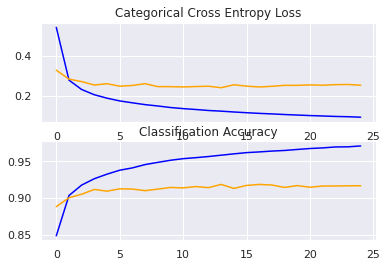

In [ ]:
history_SGD_lr_0_01_m05 = run_model(opt_LR001_M05, trainX, trainY, testX, testY)

## SGD with Nesterov momentum
Nesterov accelerated gradient (NAG) momentum, also known as Nesterov optimization, measures the gradient of the loss function not at local position, but slightly ahead in the direction of momentum. This sligth adaptation helps to reduce oscillations and accelerates convergence process. 

In [ ]:
init_LR = 0.01
bs = 32
num_epochs = 25
opt_LR001_M05_Nest = SGD(learning_rate=init_LR, momentum=0.5, decay=init_LR/num_epochs, nesterov=True)

Epoch 1/25
1563/1563 [==============================] - 107s 68ms/step - loss: 0.5710 - accuracy: 0.8487 - val_loss: 0.3393 - val_accuracy: 0.8812
Epoch 2/25
1563/1563 [==============================] - 106s 68ms/step - loss: 0.2708 - accuracy: 0.9052 - val_loss: 0.3000 - val_accuracy: 0.8929
Epoch 3/25
1563/1563 [==============================] - 101s 65ms/step - loss: 0.2284 - accuracy: 0.9187 - val_loss: 0.2742 - val_accuracy: 0.9042
Epoch 4/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.2019 - accuracy: 0.9282 - val_loss: 0.2577 - val_accuracy: 0.9088
Epoch 5/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.1850 - accuracy: 0.9353 - val_loss: 0.2632 - val_accuracy: 0.9095
Epoch 6/25
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1724 - accuracy: 0.9393 - val_loss: 0.2450 - val_accuracy: 0.9140
Epoch 7/25
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1612 - accuracy: 0.9444 - val_loss: 0

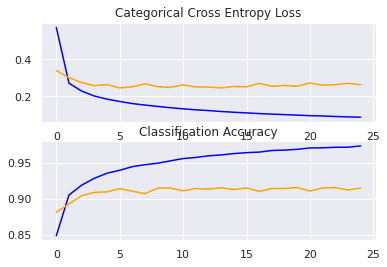

In [ ]:
history_opt_LR001_M05_Nest = run_model(opt_LR001_M05_Nest, trainX, trainY, testX, testY)

## Reducing overfitting

To reduce overfitting and help with regularization, we could try different techniques and I have chosen to add a dropout.

In [ ]:
init_LR = 0.01
bs = 32
num_epochs = 25
opt_LR001_M05_Nest = SGD(learning_rate=init_LR, momentum=0.5, decay=init_LR/num_epochs, nesterov=True)

In [ ]:
def run_model2 (opt, trainX, trainY, testX, testY):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1)))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(10, kernel_constraint=maxnorm(3))) #as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer, ensuring that the maximum norm of the weights does not exceed a value of 3
  model.add(Activation("softmax"))
  opt = opt
  model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
  
  valid_images = trainX[50000:]
  valid_labels = trainY[50000:]
  train_images = trainX[:50000]
  train_labels = trainY[:50000]

  history = model.fit(train_images, train_labels,
                        validation_data=(valid_images, valid_labels),
                        batch_size=bs,
                        epochs=num_epochs) 
  # plotting the metrics
  plt.subplot(2, 1, 1)
  plt.title('Categorical Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='val')
		# plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='val')
    
  model.summary() #We can explore our network after training and look at each step what was the shape of our network and how many parameters we have explored

  score = model.evaluate(testX, testY, verbose=0) #evaluate based on test dataset, which was not used for training and validation
  print('Loss using testing dataset=', score[0])
  print('Accuracy using testing dataset=', score[1]) 

  return history

Epoch 1/25
1563/1563 [==============================] - 152s 97ms/step - loss: 0.7484 - accuracy: 0.8168 - val_loss: 0.3463 - val_accuracy: 0.8764
Epoch 2/25
1563/1563 [==============================] - 146s 93ms/step - loss: 0.3767 - accuracy: 0.8667 - val_loss: 0.3179 - val_accuracy: 0.8856
Epoch 3/25
1563/1563 [==============================] - 146s 93ms/step - loss: 0.3375 - accuracy: 0.8797 - val_loss: 0.3082 - val_accuracy: 0.8890
Epoch 4/25
1563/1563 [==============================] - 145s 93ms/step - loss: 0.3213 - accuracy: 0.8846 - val_loss: 0.2862 - val_accuracy: 0.8984
Epoch 5/25
1563/1563 [==============================] - 146s 93ms/step - loss: 0.3108 - accuracy: 0.8893 - val_loss: 0.2879 - val_accuracy: 0.8987
Epoch 6/25
1563/1563 [==============================] - 146s 93ms/step - loss: 0.3011 - accuracy: 0.8922 - val_loss: 0.2825 - val_accuracy: 0.8983
Epoch 7/25
1563/1563 [==============================] - 147s 94ms/step - loss: 0.2930 - accuracy: 0.8957 - val_loss: 0

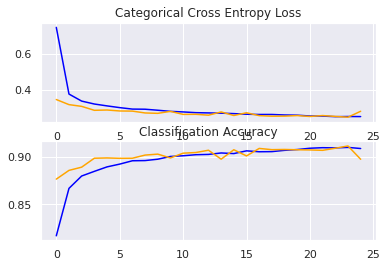

In [ ]:
history_opt_LR001_M05_Nest_d = run_model2(opt_LR001_M05_Nest, trainX, trainY, testX, testY)

# Keras - Functional
In Sequential Keras API we create the model layer-by-layer, which makes it very straightforward to use. However, sharing layers or branching layers is not allowed and we can not have multiple inputs and outputs. First, lets check if the same model as last one from Keras Sequential API (with Dropout) gives similar results to Keras Functional API. 

In [ ]:
init_LR = 0.01
bs = 32
num_epochs = 25
opt_LR001_M05_Nest = SGD(learning_rate=init_LR, momentum=0.5, decay=init_LR/num_epochs, nesterov=True)

In [ ]:
def run_functional1 (opt, trainX, trainY, testX, testY):
  inputs = Input(shape=(28,28,1), name="inputs") #define an input layer and specify the input size
  layer = Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1))(inputs)
  layer = Activation("relu")(layer)
  layer = BatchNormalization(axis=-1)(layer)
  layer = Dropout(0.2)(layer)
  layer = Conv2D(32, (3, 3), padding="same")(layer)
  layer = Activation("relu")(layer)
  layer = BatchNormalization(axis=-1)(layer)
  layer = MaxPooling2D(pool_size=(2, 2))(layer)
  layer = Flatten(name="features")(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(10, kernel_constraint=maxnorm(3))(layer)
  outputs = Activation("softmax")(layer)
  opt = opt
  model = Model(inputs, outputs)
  model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
  
  valid_images = trainX[50000:]
  valid_labels = trainY[50000:]
  train_images = trainX[:50000]
  train_labels = trainY[:50000]

  history = model.fit(train_images, train_labels,
                        validation_data=(valid_images, valid_labels),
                        batch_size=bs,
                        epochs=num_epochs) 
  # plotting the metrics
  plt.subplot(2, 1, 1)
  plt.title('Categorical Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='val')
		# plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='val')
    
  model.summary() #We can explore our network after training and look at each step what was the shape of our network and how many parameters we have explored

  score = model.evaluate(testX, testY, verbose=0) #evaluate based on test dataset, which was not used for training and validation
  print('Loss using testing dataset=', score[0])
  print('Accuracy using testing dataset=', score[1]) 

  return history

Epoch 1/25
1563/1563 [==============================] - 158s 100ms/step - loss: 0.7759 - accuracy: 0.7974 - val_loss: 0.3956 - val_accuracy: 0.8684
Epoch 2/25
1563/1563 [==============================] - 157s 101ms/step - loss: 0.4920 - accuracy: 0.8477 - val_loss: 0.3464 - val_accuracy: 0.8790
Epoch 3/25
1563/1563 [==============================] - 158s 101ms/step - loss: 0.4089 - accuracy: 0.8650 - val_loss: 0.3014 - val_accuracy: 0.8963
Epoch 4/25
1563/1563 [==============================] - 158s 101ms/step - loss: 0.3653 - accuracy: 0.8754 - val_loss: 0.3074 - val_accuracy: 0.8912
Epoch 5/25
1563/1563 [==============================] - 158s 101ms/step - loss: 0.3438 - accuracy: 0.8821 - val_loss: 0.3129 - val_accuracy: 0.8882
Epoch 6/25
1563/1563 [==============================] - 159s 101ms/step - loss: 0.3217 - accuracy: 0.8868 - val_loss: 0.2769 - val_accuracy: 0.8977
Epoch 7/25
1563/1563 [==============================] - 160s 103ms/step - loss: 0.3100 - accuracy: 0.8892 - val_

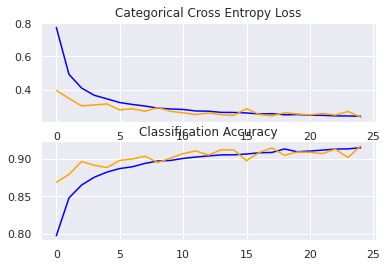

In [ ]:
functional1 = run_functional1(opt_LR001_M05_Nest, trainX, trainY, testX, testY)

From loss and accuracy metrics in training and validation data, we can see that our model is not overfitting anymore as errors are quite similar. Moreover, when looking at loss and accuracy that were calculated on a test set (data set that was not used in training and validation), we can see that accuracy increased to 0.908 and loss decreased to 0.257. 

In [ ]:
visible = Input(shape=(64,64,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

## Keras functional with two shared CNN feature extraction submodels for the same input

In [ ]:
def run_functional2 (opt, trainX, trainY, testX, testY):
  inputs = Input(shape=(28,28,1), name="inputs")
  layer1 = Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1))(inputs)
  layer1 = Activation("relu")(layer1)
  layer1 = BatchNormalization(axis=-1)(layer1)
  layer1 = Dropout(0.2)(layer1)
  layer1 = MaxPooling2D(pool_size=(2, 2))(layer1)
  layer1 = Flatten(name="features1")(layer1)

  layer2 = Conv2D(64, (3, 3), padding="same", input_shape=(28,28,1))(inputs)
  layer2 = Activation("relu")(layer2)
  layer2 = BatchNormalization(axis=-1)(layer2)
  layer2 = Dropout(0.2)(layer2)
  layer2 = MaxPooling2D(pool_size=(2, 2))(layer2)
  layer2= Flatten(name="features2")(layer2)

  #concatenate both layers
  layer = concatenate([layer1, layer2])
  layer = Flatten(name="features")(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(10, kernel_constraint=maxnorm(3))(layer)
  outputs = Activation("softmax")(layer)
  opt = opt
  model = Model(inputs, outputs)
  model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
  
  valid_images = trainX[50000:]
  valid_labels = trainY[50000:]
  train_images = trainX[:50000]
  train_labels = trainY[:50000]

  history = model.fit(train_images, train_labels,
                        validation_data=(valid_images, valid_labels),
                        batch_size=bs,
                        epochs=num_epochs) 
  # plotting the metrics
  plt.subplot(2, 1, 1)
  plt.title('Categorical Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='val')
		# plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='val')
    
  model.summary() #We can explore our network after training and look at each step what was the shape of our network and how many parameters we have explored

  score = model.evaluate(testX, testY, verbose=0) #evaluate based on test dataset, which was not used for training and validation
  print('Loss using testing dataset=', score[0])
  print('Accuracy using testing dataset=', score[1]) 

  return history

Epoch 1/25
1563/1563 [==============================] - 150s 95ms/step - loss: 0.5322 - accuracy: 0.8267 - val_loss: 0.3888 - val_accuracy: 0.8577
Epoch 2/25
1563/1563 [==============================] - 145s 92ms/step - loss: 0.3722 - accuracy: 0.8674 - val_loss: 0.3188 - val_accuracy: 0.8885
Epoch 3/25
1563/1563 [==============================] - 144s 92ms/step - loss: 0.3334 - accuracy: 0.8807 - val_loss: 0.3446 - val_accuracy: 0.8767
Epoch 4/25
1563/1563 [==============================] - 143s 92ms/step - loss: 0.3133 - accuracy: 0.8879 - val_loss: 0.3012 - val_accuracy: 0.8913
Epoch 5/25
1563/1563 [==============================] - 144s 92ms/step - loss: 0.2988 - accuracy: 0.8941 - val_loss: 0.3037 - val_accuracy: 0.8928
Epoch 6/25
1563/1563 [==============================] - 143s 92ms/step - loss: 0.2883 - accuracy: 0.8962 - val_loss: 0.2807 - val_accuracy: 0.9003
Epoch 7/25
1563/1563 [==============================] - 145s 93ms/step - loss: 0.2803 - accuracy: 0.8986 - val_loss: 0

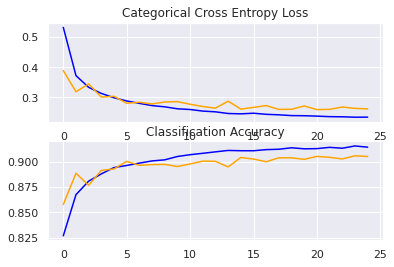

In [ ]:
functional2 = run_functional2(opt_LR001_M05_Nest, trainX, trainY, testX, testY)